In [1]:
# using PCA: principal component analysis, an unsupervised data compression method 
# 1.) Standarize the d-dimensional set
# 2.) Construct the covariance matrix
# 3.) Decompose the covariance matrix into its eigenvectors and eigenvalues
# 4.) Select k eigenvectors that correspond to the k largest eigenvalues, wheer k is the dim. of the feature subspace
#      k <= d
# 5.) Construct a projection matrix W from the 'top' k eigenvectors 
# 6.) Transform the d-dimensoinal input dataset X using the projection matrix W to obtain the new k-dim. feature sbspce

In [2]:
# load the dataset 
# step 1
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
# separate the dataset using 70 and 30 percent of the data , standardize it as well
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
x, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

/Users/toul/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


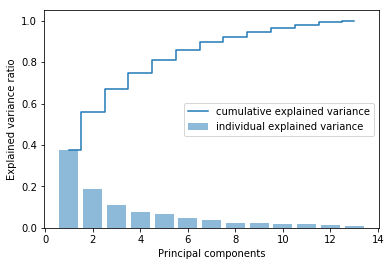

In [3]:
# step 2: construct the covariance matrix
# step 3: Decompose the covariance matrix into its eigenvectors and eigenvalues
import numpy as np
cov_mat = np.cov(x_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)

# cumulative sum of explained variances  plot via step function 
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in 
           sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()


In [4]:
# step 4: feature transformation 

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
              for i in range(len(eigen_vals))]

eigen_pairs.sort(reverse=True)

In [5]:
# capturing the variance of the set 
# step 4 cont'd:  Select k eigenvectors that correspond to the k largest eigenvalues, wheer k is the dim. of the feature subspace
#      k <= d

w=np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W: \n', w)

Matrix W: 
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


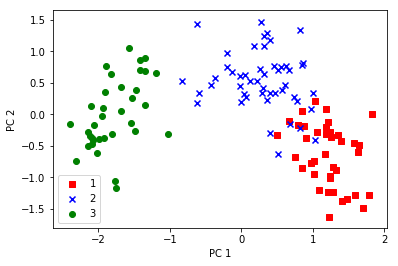

In [25]:
# Step 5: Construct a projection matrix W from the 'top' k eigenvectors 
x_train_std[0].dot(w)
# 6.) Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dim. feature sbspce
x_train_pca = x_train_std.dot(w)

#visualize the transformed dataset

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(x_train_pca[y_train==l, 0], x_train_pca[y_train==l, 1], c=c, label=l, marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [7]:
# using scikit to do it in a quicker manner 

from matplotlib.colors import ListedColormap

def plot_decision_regions(x, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s','x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface 
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

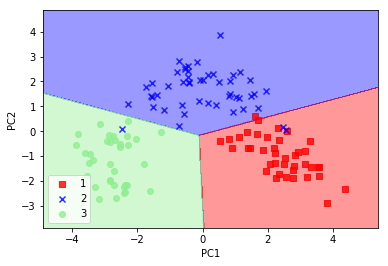

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)
lr.fit(x_train_pca, y_train)

plot_decision_regions(x_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

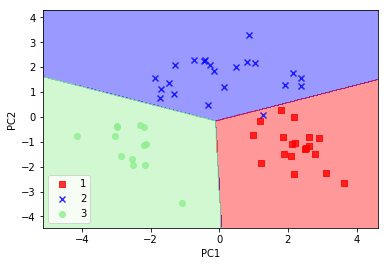

In [9]:
# plot decision regions of the logistic regression 

plot_decision_regions(x_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [10]:
# explained variance ratios 
pca = PCA(n_components=None) # so it returns it in a non sorted order
x_train_pca = pca.fit_transform(x_train_std)
pca.explained_variance_ratio_ 

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

In [11]:
# Method 2: LDA: linear discrimant analysis used for feature extraction which increases 
# computational efficiency and reduces the degree of over-fitting due to curse of dimensionality

# pca is better for image recognition tasks
# ASSUMPTIONS:
# that the data is normally distributed, classes have identical covariance matrices, and the features are stat. 
# independent of one another


In [12]:
# LDA ALGORITHM 
# Step 1: Standardize the d-dimensional dataset(d is the number of features)
# Step 2: For each class, compute the d-dimensional mean vector 
# Step 3: Construct the between-class scatter matrix S_b and the within-class scatter matrix S_w
# Step 4: Compute the eigenvectors and corresponding eigenvalues of the matrix S^-1_w S_b
# Step 5: Choose the k eigenvectors that correspond to the k largest eigenvalues to construct a 
# d x k - dimensional transformation matrix W; the eigenvectors are the columns of this matrix
# Step 6: Project the samples onto the new features subspace using the transformatino matrix W



In [13]:
# Step 2: For each class, compute the d-dimensional mean vector. SKIP 1 because it's all ready been done..
# Computing the scatter matrices 
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(x_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))
    

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [14]:
# Step 3: S_w
d = 13 # number of features 
S_W = np.zeros((d, d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in x_train[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))


Within-class scatter matrix: 13x13


In [15]:
# The class labels in the training the set aren't uniformly distributed 
print('Class label distribution: %s' % np.bincount(y_train)[1:])

Class label distribution: [40 49 35]


In [16]:
# showing the covariance matrix is a normalized version of the scatter matrix 
d = 13 
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(x_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix %sx%s ' % (S_W.shape[0], S_W.shape[1]))


Scaled within-class scatter matrix 13x13 


In [17]:
# Step 3:  S_b 
mean_overall = np.mean(x_train_std, axis=0)
d = 13
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = x_train[y_train == i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))


Between-class scatter matrix: 13x13


In [18]:
# computing the eigenpairs 
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [19]:
# solving the generalized  eigenvalue problem of the matrix of S_w^-1 S_b:


# sorting the eigenvalues in descending order 
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
              for i in range(len(eigen_vals))]

eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

print('Eigenvaules in decreasing order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvaules in decreasing order:

269.799757873
2.81194438296e-14
2.14483178831e-14
1.68689335069e-14
1.68689335069e-14
1.40782997476e-14
1.20113839905e-14
1.20113839905e-14
4.40949335143e-15
4.40949335143e-15
1.95107674682e-15
2.16267478387e-17
0.0


In [20]:
# see how much of the class-discriminatory information is captured by the linear discriminants 


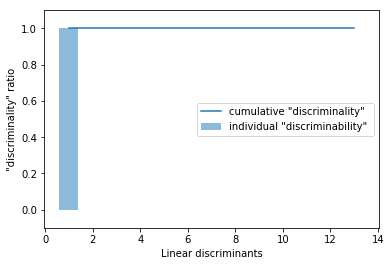

In [21]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='individual "discriminability" ')
plt.step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminality"')
plt.ylabel('"discriminality" ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()


In [22]:
# Step 5: Choose the k eigenvectors that correspond to the k largest eigenvalues to construct a 
# d x k - dimensional transformation matrix W; the eigenvectors are the columns of this matrix



In [23]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.0102  0.0518]
 [-0.0823  0.0274]
 [-0.0546 -0.2116]
 [-0.122   0.2059]
 [ 0.0062  0.0128]
 [-0.2257  0.1736]
 [ 0.8044 -0.803 ]
 [ 0.0942  0.0446]
 [-0.0508  0.016 ]
 [-0.2398 -0.3253]
 [ 0.1122  0.2249]
 [ 0.3914  0.2727]
 [ 0.2062 -0.035 ]]


In [28]:
# Step 6: Project the samples onto the new features subspace using the transformatino matrix W
x_train_lda = x_train_std.dot(w)
colors = ['r','b','g']
markers = ['s','x','o']
for l, c, m in zip(np.unique(y_train), colors, markers): 
    plt.scatter(x_train_lda[y_train==l, 0]*(-1), x_train_lda[y_train==l, 1]*(-1), c=c, label=l, marker=m)

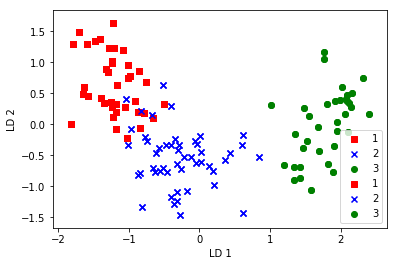

In [29]:
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.show()

In [30]:
# LDA via the sckit version 


In [32]:
from sklearn.lda import LDA 
lda = LDA(n_components=2)
x_train_lda = lda.fit_transform(x_train_std, y_train)


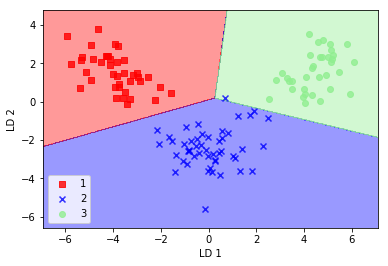

In [33]:
# logistic regression on the training dataset after the LDA transformation
lr = LogisticRegression()
lr = lr.fit(x_train_lda, y_train)
plot_decision_regions(x_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()


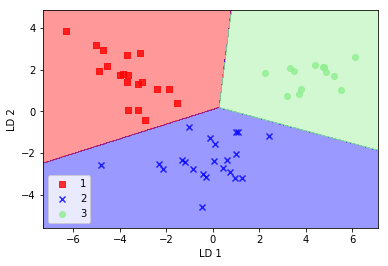

In [34]:
# check it out on the test set
x_test_lda = lda.transform(x_test_std)
plot_decision_regions(x_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()
# perfect accuracy by using a two-dimensional feature subspace instead of the original 13 wine features 

In [35]:
# kernel PCA: transforms data that is not linearly separable onto new, lower-dimensional subspace that can be used
# for linear classifers 
# use the kernel function: collects a dot product between vectors -- a measure of similarity
# implementation


In [37]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np



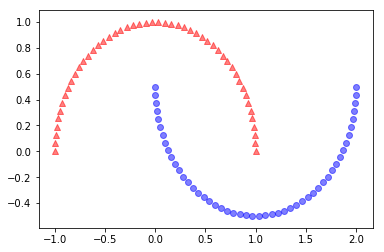

In [39]:
# practicing on the data set for half-moon shapes 
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=100, random_state=123)
plt.scatter(x[y==0, 0], x[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(x[y==1, 0], x[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

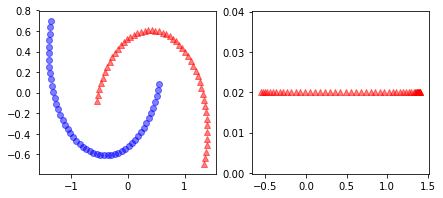

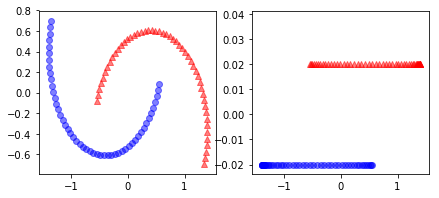

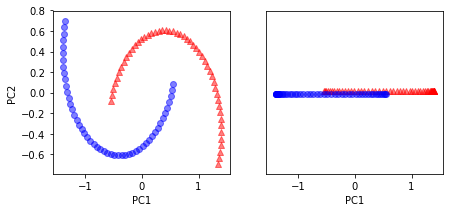

In [42]:
# what it would look like in PCA
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
x_spca = scikit_pca.fit_transform(x)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(x_spca[y==0, 0], x_spca[y==0, 1], color='red',marker='^', alpha=0.5)
ax[0].scatter(x_spca[y==1, 0], x_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(x_spca[y==0, 0], np.zeros((50, 1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(x_spca[y==1, 0], np.zeros((50,1)) - 0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

In [ ]:
# PCA is unsupervised and doesn't use class label information in order to maximxze the variabnec in contrast to LDA

In [43]:
# using the custom built PCA function 



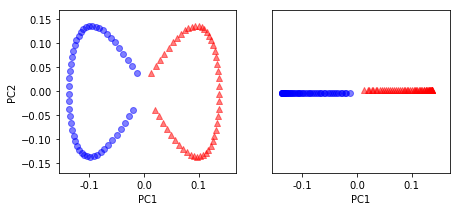

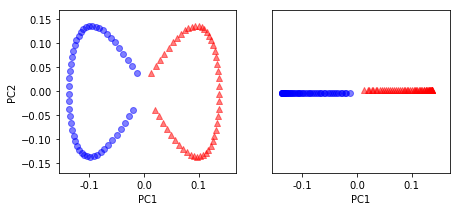

In [51]:
from matplotlib.ticker import FormatStrFormatter 

x_kpca = rbf_kernel_pca(x, gamma=15, n_components=2)

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(7,3))

ax[0].scatter(x_kpca[y==0, 0], x_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(x_kpca[y==1, 0], x_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)

ax[1].scatter(x_kpca[y==0, 0], np.zeros((50, 1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(x_kpca[y==1, 0], np.zeros((50,1)) - 0.02, color='blue', marker='o', alpha=0.5)


ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()


In [52]:
# concentric circles 
    

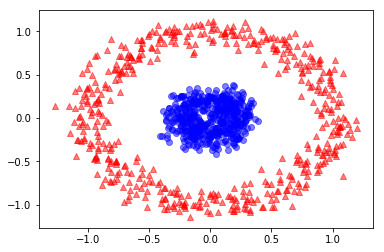

In [53]:
from sklearn.datasets import make_circles 
x, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(x[y==0, 0], x[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(x[y==1, 0], x[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()


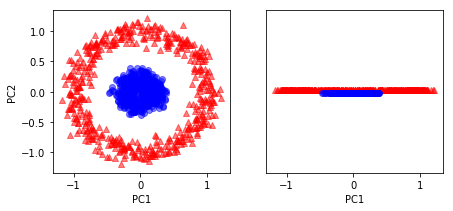

In [54]:
# standard PCA and compare it with results of RBF kernel 
scikit_pca = PCA(n_components=2)
x_spca = scikit_pca.fit_transform(x)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

ax[0].scatter(x_spca[y==0, 0], x_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(x_spca[y==1, 0], x_spca[y==1, 1], color='blue', marker='o', alpha=0.5)


ax[1].scatter(x_spca[y==0, 0], np.zeros((500,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(x_spca[y==1, 0], np.zeros((500,1)) - 0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

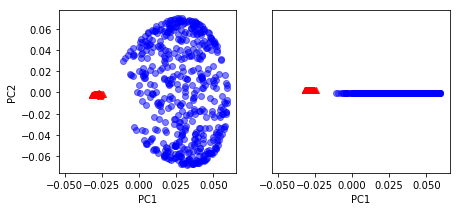

In [55]:
x_kpca = rbf_kernel_pca(x, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

ax[0].scatter(x_kpca[y==0,0], x_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(x_kpca[y==1, 0], x_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)

ax[1].scatter(x_kpca[y==0, 0], np.zeros((500,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(x_kpca[y==1, 0], np.zeros((500, 1)) - 0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.show()

In [56]:
def rbf_kernel_pca(x, gamma, n_components):
    """
    RBF kernel PCA implementation.
    
    Parameters
    -----------
    x: {NumPy ndarray}, shape = [n_samples, n_features]
    
    gamma: float
        Tuning parameter of the RBF kernel.
   
    n_components: int
        Number of principal components to return. 
        
    Returns
    ------------
   
    x_pc: {NumPy ndarray}, shape = [n_samples, k_features]
       Projected dataset
       
       lambdas: list
         Eigenvalues
       
    """
    # Calculate pairwise squared euclidean distances 
    # in MxN dimensional dataset
    sq_dists = pdist(x, 'sqeuclidean')
    
    # convert pairwise distances into a square matrix
    mat_sq_dists = squareform(sq_dists)
    
    # compute the symmetric kernel matrix
    k = exp(-gamma * mat_sq_dists)
        
    # Center the kernel matrix
    n = k.shape[0]
    one_n = np.ones((n, n)) / n 
    k = k - one_n.dot(k) - k.dot(one_n) + one_n.dot(k).dot(one_n)
    
    # Obtaining the eigenpairs from the centered kernel matrix
    # numpy.eigh returns them in sorted order
    eigvals, eigvecs = eigh(k)
    
    # collect the top k eigenvectors (projected samples)
    alphas = np.column_stack((eigvecs[:, -i]
                             for i in range(1, n_components+1)))
    
    # collect the corresponding eigenvalues
    lambdas = [eigvals[-i] for i in range(1, n_components+1)]
    
    return alphas, lambdas
    
    

In [58]:

x, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(x, gamma=15, n_components=1)

x_new = x[25]
x_new


array([ 1.8713,  0.0093])

In [60]:
x_proj = -1 * alphas[25] # original projection 
x_proj

array([ 0.0788])

In [62]:
def project_x(x_new, x, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in x])
    x = np.exp(-gamma * pair_dist)
    return x.dot(alphas / lambdas)

In [64]:
x_reproj = -1 * project_x(x_new,x, gamma=15, alphas=alphas, lambdas=lambdas)
x_reproj

array([ 0.0788])

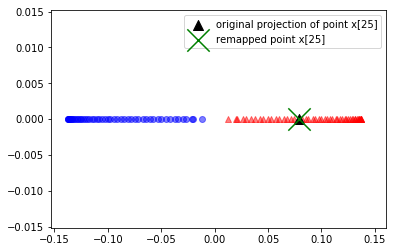

In [65]:
plt.scatter(alphas[y==0, 0], np.zeros((50)), color='red', marker='^', alpha=0.5) 
plt.scatter(alphas[y==1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)

plt.scatter(x_proj, 0, color='black', label='original projection of point x[25]', marker='^', s=100)
plt.scatter(x_reproj, 0, color='green', label='remapped point x[25]', marker='x', s=500)
plt.legend(scatterpoints=1)
plt.show()

In [67]:
# kernel decomposition class 
from sklearn.decomposition import KernelPCA
x, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)

x_skernpca = scikit_kpca.fit_transform(x)

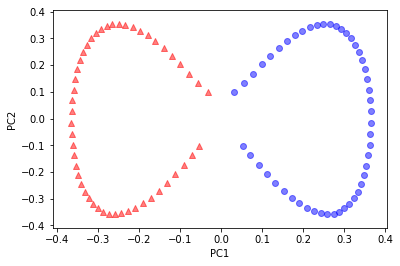

In [68]:
plt.scatter(x_skernpca[y==0, 0], x_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(x_skernpca[y==1, 0], x_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()